## Start with loading packages and switching off warnings

In [57]:
# import packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.options.display.max_rows = 999
pd.set_option("expand_frame_repr", True)

import matplotlib.pyplot as plt

# graph networks
import networkx as nx 

# open street map data
import osmnx as ox

from shapely.geometry import Point

#Import Seaborn as sns
import seaborn as sns

#Numpy for scoring 
import numpy as np


/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
#switch off warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Graph of Düsseldorf as a reference for the project 

In [12]:
# get graph for Düsseldorf
place = 'Düsseldorf, Germany'
network_type = 'walk'
#G = ox.graph_from_place(place, network_type=network_type)
G = ox.graph_from_address(place, network_type=network_type, dist=3000)

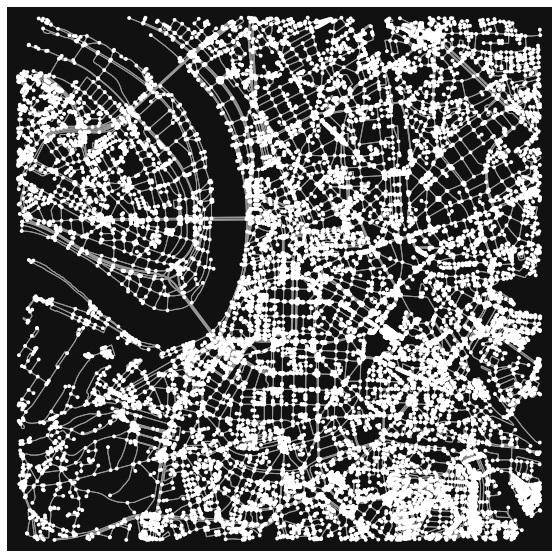

In [116]:
#show graph for database 
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)
plt.savefig(fname='Map_Düsseldorf')

## Points of interests in regarding area

In [4]:
# get list of places in Düsseldorf
# https://wiki.openstreetmap.org/wiki/Map_features#Transportation

tags = {'amenity':True, 'landuse':['retail','commercial','transportation', 'education']} 
places_df = ox.geometries.geometries_from_address(place, tags=tags)
places_df = places_df.reset_index(level=[0,1])
places_df


,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,240270700,telephone,2021-03-12,survey,POINT (6.78976 51.22756),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,240270717,parking_entrance,NaN,NaN,POINT (6.78733 51.22615),yes,Karstadt Parkhaus,multi-storey,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,240270723,cafe,NaN,survey,POINT (6.78746 51.22174),NaN,Zaxopondeiva Cafe,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,240270745,pub,NaN,survey,POINT (6.78796 51.22126),NaN,Wilma Next Generation,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,240270787,post_box,NaN,NaN,POINT (6.78729 51.21945),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,relation,8607,police,NaN,NaN,"POLYGON ((6.76765 51.21569, 6.76763 51.21567, ...",NaN,Polizeipräsidium,NaN,yes,...,NaN,1932,1929,NaN,NaN,NaN,NaN,NaN,"[23442872, 23442873, 23442874, 23442875]",flat
1548,relation,1965896,public_building,NaN,NaN,"POLYGON ((6.76966 51.22234, 6.76976 51.22248, ...",NaN,Palais Spee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[145266539, 145266543]",NaN
1549,relation,4785870,school,NaN,NaN,"MULTIPOLYGON (((6.78731 51.23520, 6.78733 51.2...",NaN,Matthias-Claudius-Schule,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[334291400, 338471626]",NaN
1550,relation,6390053,NaN,NaN,NaN,"POLYGON ((6.77846 51.22558, 6.77726 51.22556, ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[142759466],NaN


In [5]:
# filter dataframe
places_filt_df = places_df[places_df["element_type"]=="node"]
places_filt_df

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,240270700,telephone,2021-03-12,survey,POINT (6.78976 51.22756),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,240270717,parking_entrance,NaN,NaN,POINT (6.78733 51.22615),yes,Karstadt Parkhaus,multi-storey,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,240270723,cafe,NaN,survey,POINT (6.78746 51.22174),NaN,Zaxopondeiva Cafe,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,240270745,pub,NaN,survey,POINT (6.78796 51.22126),NaN,Wilma Next Generation,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,240270787,post_box,NaN,NaN,POINT (6.78729 51.21945),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,node,9073199797,vending_machine,NaN,NaN,POINT (6.78202 51.22308),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,node,9073200627,bicycle_parking,NaN,NaN,POINT (6.78355 51.22140),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1379,node,9073201970,waste_basket,NaN,NaN,POINT (6.78974 51.22079),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1380,node,9073202692,vending_machine,NaN,NaN,POINT (6.78131 51.22318),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# list all types of amenities (top 25 by count) to choose which amenity should be used as a criteria for Project
places_filt_df[["amenity"]].value_counts()

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity           
restaurant            200
bench                 192
waste_basket          117
bicycle_parking       106
vending_machine       101
cafe                   71
pub                    70
fast_food              46
recycling              38
post_box               37
bar                    29
telephone              29
atm                    29
parking_entrance       29
taxi                   25
bank                   23
doctors                21
nightclub              21
pharmacy               18
parking                17
toilets                17
theatre                12
fountain               12
kindergarten           10
clock                  10
shelter                 9
library                 8
charging_station        8
ice_cream               8
dentist                 7
motorcycle_parking      7
post_office             5
cinema                  4
arts_centre             4
social_facility         4
police                  3
ticket_validator        3
college            

In [7]:
# define list of important places
important_places_list = [
    "bar", "doctors", "kindergarten"
]

In [8]:
# filter by important places
places_filt_df = places_filt_df[places_filt_df["amenity"].isin(important_places_list)]
places_filt_df.reset_index(drop=True, inplace=True)
places_filt_df

,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,240272663,bar,NaN,NaN,POINT (6.78655 51.22208),NaN,Exodus,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,240272821,doctors,NaN,NaN,POINT (6.78351 51.22126),NaN,Kiefer- und Gesichtschirurgie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,314318860,bar,NaN,NaN,POINT (6.77363 51.22622),NaN,Twenty Four,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,719743593,bar,NaN,NaN,POINT (6.77334 51.22818),NaN,La Guantanamera,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,866734195,bar,NaN,NaN,POINT (6.77556 51.22761),NaN,Salon des Amateurs,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,node,935548781,kindergarten,NaN,NaN,POINT (6.77250 51.22850),NaN,Tageseinrichtung für Kinder - Altestadt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,node,935548792,kindergarten,NaN,NaN,POINT (6.77423 51.22673),NaN,Evangelische Tageseinrichtung für Kinder,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,node,935559068,kindergarten,NaN,NaN,POINT (6.78432 51.22077),NaN,Fröbelscher Kindergarten,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,node,935570415,kindergarten,NaN,NaN,POINT (6.79019 51.22534),NaN,Tageseinrichtung für Kinder – Hohenzollernstraße,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,node,937151140,kindergarten,NaN,NaN,POINT (6.78197 51.23422),NaN,Tageseinrichtung für Kinder - Sternstraße,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop irrelevant columns
places_filt_df = places_filt_df[["osmid", "amenity", "geometry", "name"]]
places_filt_df

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,osmid,amenity,geometry,name
0,240272663,bar,POINT (6.78655 51.22208),Exodus
1,240272821,doctors,POINT (6.78351 51.22126),Kiefer- und Gesichtschirurgie
2,314318860,bar,POINT (6.77363 51.22622),Twenty Four
3,719743593,bar,POINT (6.77334 51.22818),La Guantanamera
4,866734195,bar,POINT (6.77556 51.22761),Salon des Amateurs
5,935548781,kindergarten,POINT (6.77250 51.22850),Tageseinrichtung für Kinder - Altestadt
6,935548792,kindergarten,POINT (6.77423 51.22673),Evangelische Tageseinrichtung für Kinder
7,935559068,kindergarten,POINT (6.78432 51.22077),Fröbelscher Kindergarten
8,935570415,kindergarten,POINT (6.79019 51.22534),Tageseinrichtung für Kinder – Hohenzollernstraße
9,937151140,kindergarten,POINT (6.78197 51.23422),Tageseinrichtung für Kinder - Sternstraße


## Get data out of graph

In [28]:
# turn Graph G into nodes to check distance
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()
#x represents latitude and y represents longitude

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
5269985,51.198483,6.736442,3,NaN,NaN,POINT (6.73644 51.19848)
5270135,51.206686,6.756832,3,NaN,NaN,POINT (6.75683 51.20669)
5278499,51.215004,6.761004,1,NaN,NaN,POINT (6.76100 51.21500)
21556382,51.221888,6.791452,4,NaN,NaN,POINT (6.79145 51.22189)
21556383,51.220719,6.789764,4,NaN,NaN,POINT (6.78976 51.22072)


In [29]:
#calculate length of nodes to check to get an idea of Data
nodes=nodes.reset_index()
len(nodes)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16485

In [30]:
nodes.head()

,osmid,y,x,street_count,highway,ref,geometry
0,5269985,51.198483,6.736442,3,NaN,NaN,POINT (6.73644 51.19848)
1,5270135,51.206686,6.756832,3,NaN,NaN,POINT (6.75683 51.20669)
2,5278499,51.215004,6.761004,1,NaN,NaN,POINT (6.76100 51.21500)
3,21556382,51.221888,6.791452,4,NaN,NaN,POINT (6.79145 51.22189)
4,21556383,51.220719,6.789764,4,NaN,NaN,POINT (6.78976 51.22072)


In [49]:
#use a sample of the nodes to minimize calculation time
#at a later point sample calculations from several pcs will be combined to create the data for the project
nodes_filt=nodes.sample(2000)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#reset index and show data structure
nodes_filt=nodes_filt.reset_index()
nodes_filt.head()

,index,osmid,y,x,street_count,highway,ref,geometry
0,3521,570340208,51.216364,6.795076,3,NaN,NaN,POINT (6.79508 51.21636)
1,15598,7773277816,51.239556,6.787060,3,crossing,NaN,POINT (6.78706 51.23956)
2,15721,7896812003,51.201429,6.788670,3,NaN,NaN,POINT (6.78867 51.20143)
3,15864,8047910987,51.222365,6.775603,1,NaN,NaN,POINT (6.77560 51.22237)
4,9932,3165421586,51.202972,6.755473,1,NaN,NaN,POINT (6.75547 51.20297)


In [16]:
# function to calculate distance and travel time between two points
def calc_dist_and_time(point_1, point_2):
    
    # find node on map based on coordinates
    point_1_temp = (point_1.y, point_1.x)
    point_1_node = ox.get_nearest_node(G, point_1_temp)

    point_2_temp = (point_1.y, point_2.x)
    point_2_node = ox.get_nearest_node(G, point_2_temp)
    
    # calculate distance between two nodes
    dist_m = nx.shortest_path_length(G, point_1_node, point_2_node, weight='length')
    
    # calculate travel time based on 4.5km/h
    time = round(dist_m*0.0133)
    
    # return
    return dist_m, time

In [59]:
%%time
# loop through list of places, calculate distance and time, and plot map and information
for i in range(0,len(nodes_filt)):  
    temp_df= pd.DataFrame()
    for j in range(0,len(places_filt_df)):
        point_1 = nodes_filt.at[i, "geometry"]
     
        
        point_2 = places_filt_df.at[j, "geometry"]
        amenity_2= places_filt_df.at[j, 'amenity']

        #print(f'point_1: {point_1}, point_2: {point_2}')
        
        meta_info2=calc_dist_and_time(point_1, point_2)
        #print(meta_info2)
        distance_m=meta_info2[0]
        distance_time=meta_info2[1]
        #temporäre Tabelle anlegen. Da sonst I wieder überschrieben wird
        temp_df.at[j,'minutes']=distance_time
        temp_df.at[j, 'amenity']=amenity_2
        
    places_grouped=temp_df.groupby(["amenity"]).agg({'minutes': 'min'})
    nodes_filt.at[i,'avg_minutes']=places_grouped['minutes'].mean()


KeyboardInterrupt: 

In [52]:
nodes_filt

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,osmid,y,x,street_count,highway,ref,geometry,avg_minutes
0,3521,570340208,51.216364,6.795076,3,NaN,NaN,POINT (6.79508 51.21636),6.000000
1,15598,7773277816,51.239556,6.787060,3,crossing,NaN,POINT (6.78706 51.23956),0.000000
2,15721,7896812003,51.201429,6.788670,3,NaN,NaN,POINT (6.78867 51.20143),1.333333
3,15864,8047910987,51.222365,6.775603,1,NaN,NaN,POINT (6.77560 51.22237),1.666667
4,9932,3165421586,51.202972,6.755473,1,NaN,NaN,POINT (6.75547 51.20297),46.333333
...,...,...,...,...,...,...,...,...,...
1995,7954,1995330396,51.228287,6.799565,3,NaN,NaN,POINT (6.79956 51.22829),NaN
1996,1647,267768377,51.205168,6.802241,3,NaN,NaN,POINT (6.80224 51.20517),NaN
1997,1307,254147817,51.246451,6.809047,3,NaN,NaN,POINT (6.80905 51.24645),NaN
1998,3150,483385328,51.242463,6.766796,1,NaN,NaN,POINT (6.76680 51.24246),NaN


In [66]:
#answering which nodes stands for 15-Minutes city
nodes_filt['15_minutes']=(nodes_filt['avg_minutes']<=15)
nodes_filt

#import datetime
import datetime as dt

#save data to csv
nodes_filt.to_csv(f'nodes_{dt.datetime.now()}.csv', index= False)

## Loading and appending nodes_filt with different sample sizes

In [ ]:
#we have three samples with sizes 5000 (nodes_2021-09-11 10_01_40.504514.csv), 3000 (nodes_2021-09-11 18_57_35.740006.csv)
#and 1268 (nodes_2021-09-11 21:11:59.791009.csv). All of them can be find in the repository recordingly.

In [72]:
# load first file
nodes_filt_1268=pd.read_csv('/Users/philinesophie/nodes_2021-09-11 21:11:59.791009.csv', encoding = "latin")
nodes_filt_1268= nodes_filt_1268[nodes_filt_1268['avg_minutes'].isna()==False]

In [92]:
# drop irrelevant columns to match the samples 5000 and 3000 that are already in this structure
nodes_filt_1268 = nodes_filt_1268[["y", "x", "street_count", "highway", "ref", 'geometry', 'avg_minutes', '15_minutes']]
nodes_filt_1268

,y,x,street_count,highway,ref,geometry,avg_minutes,15_minutes
0,51.216364,6.795076,3,NaN,NaN,POINT (6.7950759 51.2163639),6.000000,True
1,51.239556,6.787060,3,crossing,NaN,POINT (6.7870597 51.2395562),0.000000,True
2,51.201429,6.788670,3,NaN,NaN,POINT (6.7886697 51.2014292),1.333333,True
3,51.222365,6.775603,1,NaN,NaN,POINT (6.7756033 51.2223654),1.666667,True
4,51.202972,6.755473,1,NaN,NaN,POINT (6.7554731 51.2029719),46.333333,False
...,...,...,...,...,...,...,...,...
1263,51.235723,6.784872,1,NaN,NaN,POINT (6.7848723 51.2357234),1.666667,True
1264,51.206977,6.757179,4,NaN,NaN,POINT (6.7571795 51.2069772),14.333333,True
1265,51.219728,6.795541,1,NaN,NaN,POINT (6.7955414 51.2197277),7.333333,True
1266,51.233976,6.772791,3,NaN,NaN,POINT (6.7727909 51.2339764),1.000000,True


In [84]:
#load new csv file and drop rows with NaN for 'avg_minutes' for second file
nodes_filt_5000=pd.read_csv('/Users/philinesophie/nodes_2021-09-11 10_01_40.504514.csv', encoding = "latin")
nodes_filt_5000= nodes_filt_5000[nodes_filt_5000['avg_minutes'].isna()==False]

In [85]:
#load new csv file and drop rows with NaN for 'avg_minutes' for third file
nodes_filt_3000=pd.read_csv('/Users/philinesophie/nodes_2021-09-11 18_57_35.740006.csv', encoding = "latin")
nodes_filt_3000= nodes_filt_3000[nodes_filt_3000['avg_minutes'].isna()==False]

In [93]:
#append datasets to enlarge the data for the map
nodes_filt = pd.concat([nodes_filt_1268, nodes_filt_3000, nodes_filt_5000], ignore_index=True, sort=True)

In [108]:
#drop duplicates 
nodes_filt = nodes_filt.drop_duplicates(subset= ['geometry'], keep='last')

In [109]:
#reset index
nodes_filt.reset_index(drop=True, inplace=True)
nodes_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784 entries, 0 to 7783
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   15_minutes    7784 non-null   bool   
 1   avg_minutes   7784 non-null   float64
 2   geometry      7784 non-null   object 
 3   highway       799 non-null    object 
 4   ref           11 non-null     object 
 5   street_count  7784 non-null   int64  
 6   x             7784 non-null   float64
 7   y             7784 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 433.4+ KB


In [112]:
#safe the combined and cleaned dataset
nodes_filt.to_csv(f'nodes_combined_{dt.datetime.now()}.csv', index= False)

## Visualize the data with seaborn scatterplot

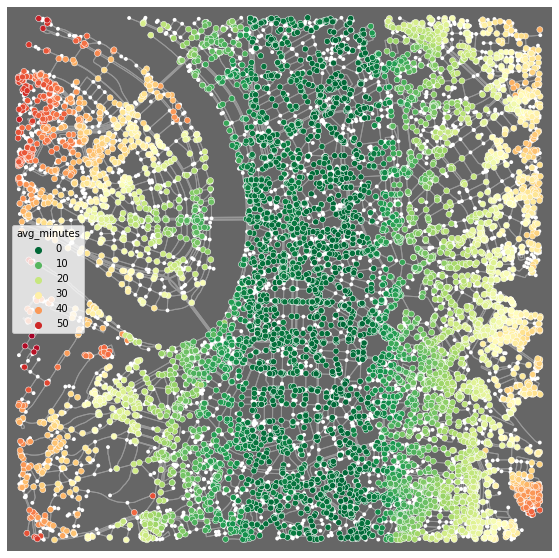

In [114]:
#With Seaborn Plot Map for 'avg-minutes'

#plot whole map
ox.plot_graph(G, figsize=(10, 10), bgcolor='#666666', show=False, close=False)
# Point of Interest

sns.scatterplot(data=nodes_filt,x='x', y='y', hue= 'avg_minutes', palette='RdYlGn_r')
plt.savefig(fname='avg_minutes_düsseldorf')

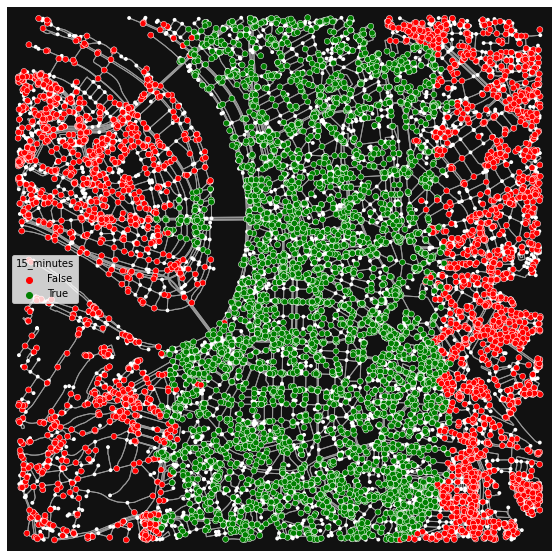

In [115]:
#With Seaborn Plot Map for '15_minutes' answering wich parts of Düsseldorf are a 15-Minute city

#plot whole map
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)
# Point of Interest

sns.scatterplot(data=nodes_filt,x='x', y='y', hue= '15_minutes', palette= ['red','green'])
plt.savefig(fname='15_minutes_düsseldorf')